<a href="https://colab.research.google.com/github/Vinayak-Garudi/ML_Classification/blob/main/ML_Classificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Classification of Handwritten Digit Recognition on MNIST dataset

In [2]:
# Fetching dataset

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('MNIST_784')        #maybe here instead of MNIST_784, mnist_784 would come

In [5]:
x, y = mnist['data'], mnist['target']

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
some_digit = x.to_numpy()[36001]         #this is the position of certain value I just took it random position
some_digit_image = some_digit.reshape(28,28)     #reshape to plot the image

(-0.5, 27.5, 27.5, -0.5)

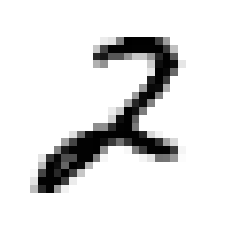

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")      #the axis of the image will be removed
# where imshow means image-show which plots/shows the image
# cmap means colour-map from range 0(white) to 1(black)
# matplotlib.cm.binary means from matplotlib from cm(color-map) of binary values i.e. either 0(white) or 1(black)
# there are also other color options eg for blues cm.Blues, etc
# interpolation='nearest' simply displays an image without trying to interpolate between pixels
# if the display resolution is not the same as the image resolution(which is most often the case).
# It will result an image in which pixels are displayed as a square of multiple pixels.

In [9]:
y[36001]

'2'

In [10]:
x_train, x_test = x[:60000], x[60000:]

In [11]:
y_train, y_test = y[:60000], y[60000:]

In [12]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.loc[shuffle_index], y_train.loc[shuffle_index]

In [13]:
# Creating a 2 detector

In [14]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [15]:
y_train_2

16111    False
41993    False
54313    False
14275    False
974      False
         ...  
23288    False
12390    False
26594    False
48528    False
20806    False
Name: class, Length: 60000, dtype: bool

In [16]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()      #by putting tol the code will execute faster but here it is not needed

In [19]:
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [21]:
from sklearn.model_selection import cross_val_score       #for regression CrossValidation and for classification cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [22]:
a.mean()

0.9782500000000001

In [23]:
# in the above example I used accuracy as a classifier but it is not a good classifier
# hence I will use Precision, Recall and F1 score for better results

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [27]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [28]:
# Calculating Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train_2,y_train_pred)

array([[53555,   487],
       [  818,  5140]])

In [31]:
# Precision and recall

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision_score(y_train_2,y_train_pred)

0.9134529944908477

In [34]:
recall_score(y_train_2,y_train_pred)

0.8627056059080228

In [35]:
# Calculating F1 score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_2,y_train_pred)

0.8873543375053948

In [38]:
# Precision Recall curve

In [39]:
from sklearn.metrics import precision_recall_curve

In [46]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [47]:
y_scores

array([-18.03026911,  -7.58301081,  -5.57857593, ...,  -6.42902156,
        -5.58198771,  -3.167865  ])

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2,y_scores)

In [49]:
precisions

array([0.10147667, 0.10146137, 0.1014631 , ..., 1.        , 1.        ,
       1.        ])

In [50]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [51]:
thresholds

array([-22.88154349, -22.87668684, -22.87523683, ...,  17.39843313,
        18.09776082,  19.48045952])

In [52]:
# Plotting the Precision Recall curve

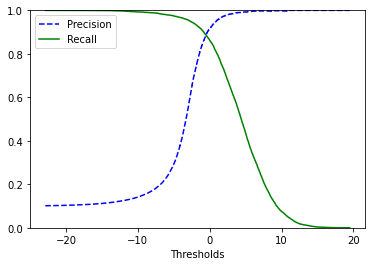

In [56]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [57]:
# from the above plot we can see that precision and recall are inversely proportional